# EDA

contents
1. Overview
2. Sentence
3. UNK

## 1. Overview

In [294]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer
import re

In [247]:
train_df = pd.read_csv('train/train.csv')
test_df = pd.read_csv('test/test_data.csv')

### columns
- subject_intity
- object_entity
- label

In [248]:
# 데이터셋 크기
print(len(train_df))
print(len(test_df))

32470
7765


In [249]:
# NULL 값은 없다.
print(len(train_df.dropna()))
print(len(test_df.dropna()))

32470
7765


In [250]:
# 중복값도 없다.
print(len(train_df.drop_duplicates()))
print(len(test_df.drop_duplicates()))

32470
7765


In [251]:
train_df.sample(5)

,id,sentence,subject_entity,object_entity,label,source
2197,2197,"지난 27일 국회 행정안전위원회 소병훈 의원(더불어민주당, 경기 광주시갑)이 경찰청...","{'word': '소병훈', 'start_idx': 18, 'end_idx': 20...","{'word': '행정안전위원회', 'start_idx': 10, 'end_idx'...",per:employee_of,wikitree
24340,24340,"잉글랜드 축구 대표팀의 '레전드' 게리 리네커는 자신의 트위터 계정에 ""와우! 손흥...","{'word': '게리 리네커', 'start_idx': 19, 'end_idx':...","{'word': '잉글랜드', 'start_idx': 0, 'end_idx': 3,...",per:origin,wikitree
3611,3611,"2016년에는 UEFA 올해의 여자 선수, 노르웨이 스포츠 기자 협회가 선정한 노르...","{'word': '영국 방송 협회', 'start_idx': 82, 'end_idx...","{'word': 'BBC', 'start_idx': 91, 'end_idx': 93...",org:alternate_names,wikipedia
771,771,이에 AMD는 과거 전성기를 이끌었던 애슬론 64와 x86-64 아키텍쳐의 설계를 ...,"{'word': '짐 켈러', 'start_idx': 55, 'end_idx': 5...","{'word': '엔지니어', 'start_idx': 50, 'end_idx': 5...",per:title,wikipedia
20036,20036,"그러나 1922년 레닌이 지원한 자금 중 이동휘, 한형권 등과 함께 60만 루블만을...","{'word': '한인사회당', 'start_idx': 63, 'end_idx': ...","{'word': '이동휘', 'start_idx': 23, 'end_idx': 25...",org:top_members/employees,wikipedia


In [252]:
test_df.sample(5)

,id,sentence,subject_entity,object_entity,label,source
4200,4200,1952년 4월 28일에 미국과 일본 간의 샌프란시스코 강화조약이 체결/발효됨에 따...,"{'word': '연합군 최고사령부', 'start_idx': 48, 'end_id...","{'word': '1952년 4월 28일', 'start_idx': 0, 'end_...",100,wikipedia
3288,3288,모든 동원군은 점차 동원 해제되었으며 베르놀라크 육군은 10월 7일에 해산되었다.,"{'word': '베르놀라크 육군', 'start_idx': 21, 'end_idx...","{'word': '10월 7일', 'start_idx': 31, 'end_idx':...",100,wikipedia
371,371,『후한서』 동이전에 따르면 건무중원 2년(기원후 57년) 후한 광무제에게 왜노국(倭...,"{'word': '광무제', 'start_idx': 35, 'end_idx': 37...","{'word': '건무중원', 'start_idx': 15, 'end_idx': 1...",100,wikipedia
1214,1214,노키아 N9는 TI OMAP 3630 칩을 사용한다.,"{'word': '노키아', 'start_idx': 0, 'end_idx': 2, ...","{'word': 'N9', 'start_idx': 4, 'end_idx': 5, '...",100,wikipedia
1532,1532,"프리드리히 올브리히트(Friedrich Olbricht, 1888년 10월 4일 ~...","{'word': '프리드리히 올브리히트', 'start_idx': 0, 'end_i...","{'word': '1944년 7월 20일', 'start_idx': 72, 'end...",100,wikipedia


### subject_entity, object_entity
- 단어, 단어 인덱스, type으로 구성 (모델의 입력으로 들어가는 것은 '단어' 뿐)
- dictionary로 보이지만 str로 되어 있음.
- baseline 코드에서도 str로 취급하고 돌리고 있으니,굳이 dictionary로 바꿔줄 필요는 없음.
- EDA에서는 분석 편의를 위해 dictonary로 바꿔주었음.

In [253]:
# subject_entity는 주체 단어, 단어의 인덱스, type
train_df['subject_entity'][0]

"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}"

In [254]:
# dict처럼 보이지만 알고보면 str이다.
type(train_df['subject_entity'][0]) 

str

In [255]:
# object_entity는 객체 단어, 단어의 인덱스, type
train_df['object_entity'][0]

"{'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}"

In [256]:
# subject_entity, object_entity 분석의 편의를 위해 str -> dict로 변경
train_df['subject_entity'] = train_df['subject_entity'].apply(lambda x: literal_eval(x))
train_df['object_entity'] = train_df['object_entity'].apply(lambda x: literal_eval(x))

test_df['subject_entity'] = test_df['subject_entity'].apply(lambda x: literal_eval(x))
test_df['object_entity'] = test_df['object_entity'].apply(lambda x: literal_eval(x))

In [467]:
train_df['subject_entity'].apply(len).unique()

array([4])

In [468]:
train_df['object_entity'].apply(len).unique()

array([4])

KLUE 논문에 의하면 relation schema(dataset에서는 'type')은 Text Analysis Conference Knowledge Base Population (TAC-KBP) 를 따랐다고 함. <br>
PER: person <br>
ORG: organization <br>
LOC: location <br>
DAT: date and time <br>
POH: other proper nouns <br>
NOH: other numerals 

**type값과 label 간 상관관계가 보임**. 이것도 word와 마찬가지로 학습에 넣어주면(special token?) **성능 향상**이 예상됨. (아래 참고). <br> 
예: [CLS]'민주평화당'[SEP]'ORG'[SEP]'대안신당'[SEP]'ORG'[SEP] 호남이 기반인 바른미래당 · 대안신당 · 민주평화당이 우여곡절 끝에 합당해 민생당 ( 가칭 ) 으로 재탄생한다. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]

In [408]:
# subject_entity, object_entity의 type 종류
# test set에는 train set에는 없는 'LOC' 타입이 있다. (딱 1건 존재)
train_df['sub_type'] = train_df['subject_entity'].apply(lambda x: x['type'])
train_df['obj_type'] = train_df['object_entity'].apply(lambda x: x['type'])

test_df['sub_type'] = test_df['subject_entity'].apply(lambda x: x['type'])
test_df['obj_type'] = test_df['object_entity'].apply(lambda x: x['type'])
                                                        

print(train_df['sub_type'].unique())
print(test_df['sub_type'].unique())

['ORG' 'PER']
['ORG' 'PER' 'LOC']


In [409]:
test_df[test_df['sub_type']== 'LOC']

,id,sentence,subject_entity,object_entity,label,source,sub_start_idx,obj_start_idx,sub_word,obj_word,tokens,UNK_count,sub_type,obj_type
6820,6820,"1875년 시카고 빈민가에 교회를 설립했는데, 구두판매원출신다운 쉽고 설득력있는 무...","{'word': '시카고', 'start_idx': 6, 'end_idx': 8, ...","{'word': '1875년', 'start_idx': 0, 'end_idx': 4...",100,wikipedia,6,0,시카고,1875년,"[CLS] 1875년 시카고 빈민가에 교회를 설립했는데, 구두판매원출신다운 쉽고 설...",0,LOC,DAT


In [410]:
# obejct_entity의 type은 train, test가 동일하다.
print(sorted(train_df['obj_type'].unique()))
print(sorted(test_df['obj_type'].unique()))

['DAT', 'LOC', 'NOH', 'ORG', 'PER', 'POH']
['DAT', 'LOC', 'NOH', 'ORG', 'PER', 'POH']


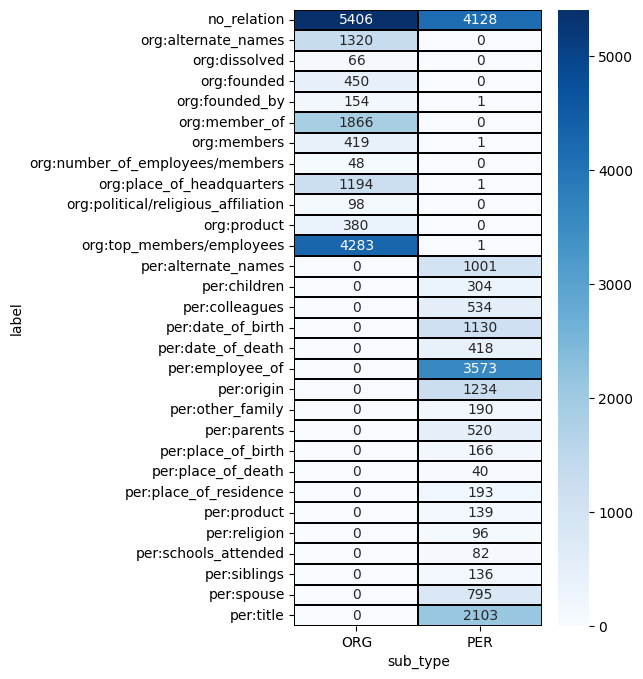

In [516]:
# sub_type label 간 cross table heatmap.
# sub_type이 무엇이냐에 따라서 label이 명확히 나뉜다.
sub_type_cross_tab = pd.crosstab(train_df['sub_type'], train_df['label'], margins=False)

plt.figure(figsize = (4, 8))
sns.heatmap(sub_type_cross_tab.T, annot=True, fmt=".0f", cmap='Blues', linewidths=0.1, linecolor='black', xticklabels=True, yticklabels=True)
plt.show()

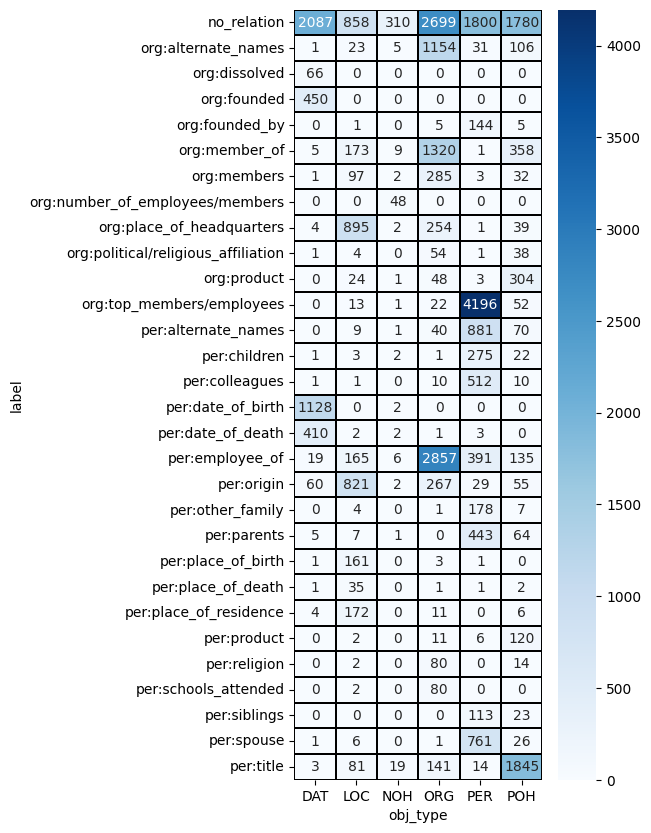

In [510]:
# obj_type label 간 cross table heatmap.
# obj_type=PER, org:top_members/employesss (4196)
# obj_type=ORG, per:employee_of (2857)
# 등이 관계가 있음.
# 직관적으로 생각해보면, '주체-객체' 간 관계가 '고용주-근로자' 라면 orj_type은 PER일 것.
# '회사-근로자'의 관계라면 obj_type은 ORG일 것.
obj_type_cross_tab = pd.crosstab(train_df['obj_type'], train_df['label'], margins=False)

plt.figure(figsize = (4, 10))
sns.heatmap(obj_type_cross_tab.T, annot=True, fmt=".0f", cmap='Blues', linewidths=0.1, linecolor='black', xticklabels=True, yticklabels=True)
# plt.figsize = (100, 100)
plt.show()

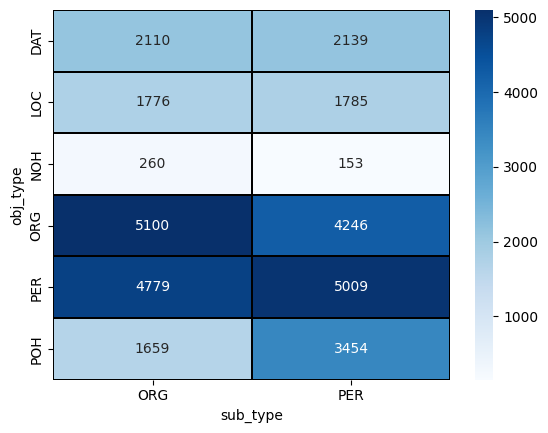

In [512]:
#sub_type, obj_type 간 cross table heatmap
sub_obj_cross_tab = pd.crosstab(train_df['sub_type'], train_df['obj_type'], margins=False)

# plt.figure(figsize = (4, 10))
sns.heatmap(sub_obj_cross_tab.T, annot=True, fmt=".0f", cmap='Blues', linewidths=0.1, linecolor='black', xticklabels=True, yticklabels=True)
plt.show()

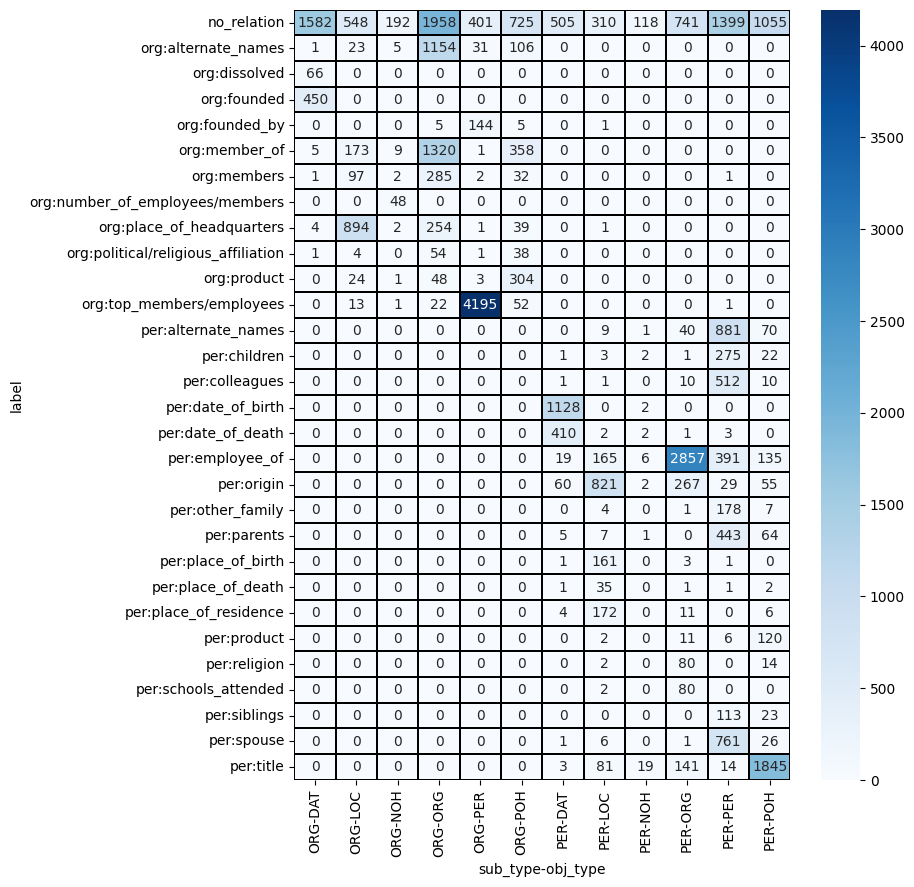

In [515]:
# sub_type, obj_type label 간 cross table heatmap.
# 주체-객체-레이블 
# ORG-PER -> org:top_members/employees
# PER-ORG -> per:employee_of (주체가 사람, 객체가 조직) OOO은 A회사의 근로자이다.
# PER-POH -> per:title (주체가 사람, 객체가 고유명사.) 


sub_obj_label_cross_tab = pd.crosstab([train_df['sub_type'], train_df['obj_type']], train_df['label'], margins=False)

plt.figure(figsize = (8, 10))
sns.heatmap(sub_obj_label_cross_tab.T, annot=True, fmt=".0f", cmap='Blues', linewidths=0.1, linecolor='black', xticklabels=True, yticklabels=True)
plt.show()

In [261]:
# 주체, 객체가 주로 문장에서 앞쪽에 위치하는지, 뒤쪽에 위치하는지를 확인해보자. 
train_df['sub_start_idx'] = train_df['subject_entity'].apply(lambda x: x['start_idx'])
train_df['obj_start_idx'] = train_df['object_entity'].apply(lambda x: x['start_idx'])

test_df['sub_start_idx'] = test_df['subject_entity'].apply(lambda x: x['start_idx'])
test_df['obj_start_idx'] = test_df['object_entity'].apply(lambda x: x['start_idx'])

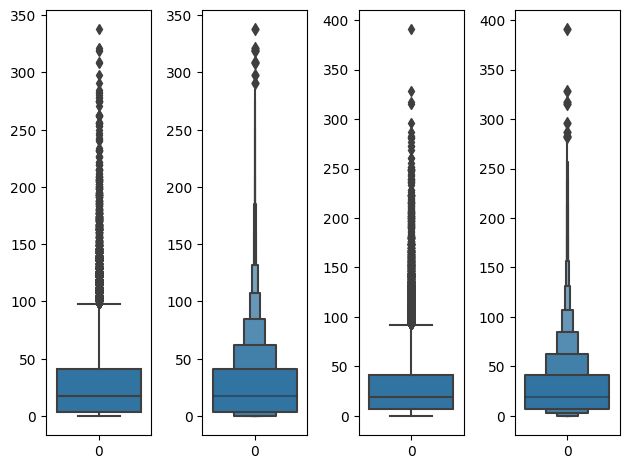

In [262]:
# 학습셋의 sub_start index, obj start index 위치
# 0~50이 대부분.
plt.subplot(1,4,1)
ax1 = sns.boxplot(data=train_df['sub_start_idx'])

plt.subplot(1,4,2)
sns.boxenplot(data=train_df['sub_start_idx'])

plt.subplot(1,4,3)
ax1 = sns.boxplot(data=train_df['obj_start_idx'])

plt.subplot(1,4,4)
sns.boxenplot(data=train_df['obj_start_idx'])
plt.tight_layout()
plt.show()

In [191]:
train_df['sub_start_idx'].describe()

count    32470.000000
mean        27.539852
std         33.102263
min          0.000000
25%          3.000000
50%         17.000000
75%         41.000000
max        338.000000
Name: sub_start_idx, dtype: float64

In [192]:
train_df['obj_start_idx'].describe()

count    32470.000000
mean        29.254050
std         32.136991
min          0.000000
25%          7.000000
50%         19.000000
75%         41.000000
max        391.000000
Name: obj_start_idx, dtype: float64

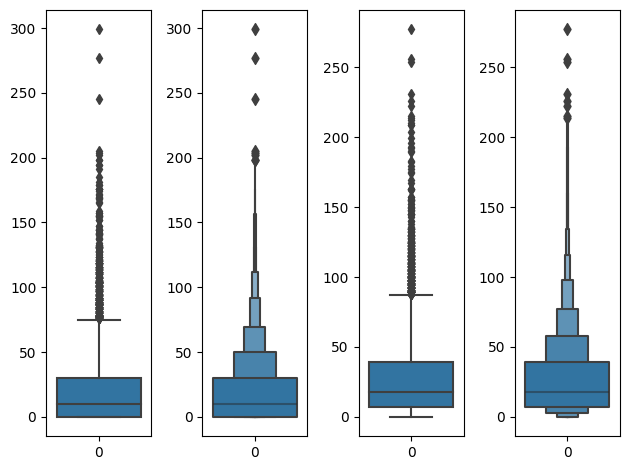

In [263]:
# 테스트셋의 sub_start index, obj start index 위치
# 인덱스들이 학습셋보다 좀 더 앞쪽에 위치한 듯 보임.
plt.subplot(1,4,1)
ax1 = sns.boxplot(data=test_df['sub_start_idx'])

plt.subplot(1,4,2)
sns.boxenplot(data=test_df['sub_start_idx'])

plt.subplot(1,4,3)
ax1 = sns.boxplot(data=test_df['obj_start_idx'])

plt.subplot(1,4,4)
sns.boxenplot(data=test_df['obj_start_idx'])
plt.tight_layout()
plt.show()

In [194]:
test_df['sub_start_idx'].describe()

count    7765.000000
mean       20.593175
std        27.800751
min         0.000000
25%         0.000000
50%        10.000000
75%        30.000000
max       299.000000
Name: sub_start_idx, dtype: float64

In [195]:
test_df['obj_start_idx'].describe()

count    7765.000000
mean       27.281777
std        28.915971
min         0.000000
25%         7.000000
50%        18.000000
75%        39.000000
max       277.000000
Name: obj_start_idx, dtype: float64

In [264]:
# 26개
train_df[train_df['sub_start_idx'] > 256]

,id,sentence,subject_entity,object_entity,label,source,sub_start_idx,obj_start_idx
2390,2390,한 편 전투가 끝난 후에 아슈와타마는 두료다나로부터 자신의 아버지인 드로나가 죽은 ...,"{'word': '아르주나', 'start_idx': 338, 'end_idx': ...","{'word': '판다바', 'start_idx': 61, 'end_idx': 63...",no_relation,wikipedia,338,61
4077,4077,마우리아-셀레우코스 전쟁 이후 찬드라굽타 마우리아는 인도 아대륙 안쪽으로 관심을 돌...,"{'word': '빈두사라', 'start_idx': 309, 'end_idx': ...","{'word': '찬드라굽타 마우리아', 'start_idx': 17, 'end_i...",per:parents,wikipedia,309,17
4608,4608,이에 따라 보통 20석 이상을 가진 대규모 정당을 중심으로 교섭단체가 구성되어 정당...,"{'word': '민생당', 'start_idx': 262, 'end_idx': 2...","{'word': '민주평화당', 'start_idx': 216, 'end_idx':...",no_relation,wikipedia,262,216
6895,6895,기원전 1400년에 발생한 다사라즈나 전투가 이들 인도아리아 부족들 사이에 발생한 ...,"{'word': '바라타족', 'start_idx': 275, 'end_idx': ...","{'word': '푸루족', 'start_idx': 228, 'end_idx': 2...",no_relation,wikipedia,275,228
10039,10039,포뮬러 원 월드 드라이버스 챔피언십 Formula One World Drivers'...,"{'word': '알베르토 아스카리', 'start_idx': 263, 'end_i...","{'word': 'Alberto Ascari', 'start_idx': 273, '...",per:alternate_names,wikipedia,263,273
10505,10505,신장은 178cm이고 체중은 100kg인 그는 1960년 연극배우 첫 데뷔하였으며 ...,"{'word': '동양방송', 'start_idx': 319, 'end_idx': ...","{'word': 'TBC', 'start_idx': 315, 'end_idx': 3...",org:alternate_names,wikipedia,319,315
13180,13180,"준 플레이오프에서 삼성에게 2패를 당하여, 포스트 시즌을 마감했는데 한화(당시 빙그...","{'word': '장종훈', 'start_idx': 275, 'end_idx': 2...","{'word': '유격수', 'start_idx': 166, 'end_idx': 1...",per:title,wikipedia,275,166
13877,13877,1942년 경성치과전문학교 입학을 하였고 1943년 2월에서 1945년 2월까지 2...,"{'word': '서울대학교', 'start_idx': 283, 'end_idx':...","{'word': '1946년', 'start_idx': 89, 'end_idx': ...",no_relation,wikipedia,283,89
15202,15202,이에 따라 보통 20석 이상을 가진 대규모 정당을 중심으로 교섭단체가 구성되어 정당...,"{'word': '민생당', 'start_idx': 262, 'end_idx': 2...","{'word': '민주통합의원모임', 'start_idx': 252, 'end_id...",org:member_of,wikipedia,262,252
15533,15533,"'망치부인'이라는 명칭은 미국 영화 《쇼생크 탈출》에서 영감을 받은 것으로, '망치...","{'word': '망치부인', 'start_idx': 263, 'end_idx': ...","{'word': '이경선', 'start_idx': 175, 'end_idx': 1...",per:alternate_names,wikipedia,263,175


In [265]:
# idx는 음절 위치인가? Yes
train_df['sub_word'] = train_df['subject_entity'].apply(lambda x: x['word'])
train_df['obj_word'] = train_df['object_entity'].apply(lambda x: x['word'])

test_df['sub_word'] = test_df['subject_entity'].apply(lambda x: x['word'])
test_df['obj_word'] = test_df['object_entity'].apply(lambda x: x['word'])

In [278]:
train_df.iloc[0]

id                                                                0
sentence          〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...
subject_entity    {'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...
object_entity     {'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...
label                                                   no_relation
source                                                    wikipedia
sub_start_idx                                                    24
obj_start_idx                                                    13
sub_word                                                        비틀즈
obj_word                                                     조지 해리슨
Name: 0, dtype: object

In [274]:
train_df['sentence'][0][train_df['sub_start_idx'][0]]

'비'

In [277]:
train_df['sentence'][0][train_df['obj_start_idx'][0]]

'조'

In [239]:
# 16개
train_df[train_df['obj_start_idx'] > 256]

,id,sentence,subject_entity,object_entity,label,source,sub_start_idx,obj_start_idx,tokens,UNK_count
1600,1600,"그 뒤, 1995년 태평양 재활군 투수코치로 본격적인 코치생활을 시작하여 1996년...","{'word': 'SK 와이번스', 'start_idx': 170, 'end_idx...","{'word': '2003년', 'start_idx': 317, 'end_idx':...",no_relation,wikipedia,170,317,"[CLS] 그 뒤, 1995년 태평양 재활군 투수코치로 본격적인 코치생활을 시작하여...",0
1731,1731,그 후 메이란팡 등의 첩보원 등을 지내다가 1945년 중화민국 광둥 성 광저우 지방...,"{'word': '중화민국', 'start_idx': 106, 'end_idx': ...","{'word': '타이베이', 'start_idx': 287, 'end_idx': ...",no_relation,wikipedia,106,287,[CLS] 그 후 메이란팡 등의 첩보원 등을 지내다가 1945년 중화민국 광둥 성 ...,1
2852,2852,대한신학대학원대학교의 역사는 대한신학교부터 시작한다. 고봉(高峰) 김치선 목사가 1...,"{'word': '대한신학대학원대학교', 'start_idx': 0, 'end_id...","{'word': '1996년 12월 6일', 'start_idx': 261, 'en...",no_relation,wikipedia,0,261,[CLS] 대한신학대학원대학교의 역사는 대한신학교부터 시작한다. 고봉 ( 高 [UN...,1
5175,5175,"현대트랜시스는 국내를 포함해 중국 4개공장, 인도 첸나이 공장 , 브라질 피라시카바...","{'word': '현대다이모스', 'start_idx': 241, 'end_idx'...","{'word': '현대트랜시스', 'start_idx': 277, 'end_idx'...",org:alternate_names,wikipedia,241,277,"[CLS] 현대트랜시스는 국내를 포함해 중국 4개공장, 인도 첸나이 공장, 브라질 ...",0
5317,5317,“1920년 11월부터 12월까지 진행된 이희간의 귀순 및 회유 공작을 받아들인 김...,"{'word': '배정자', 'start_idx': 215, 'end_idx': 2...","{'word': '대한민국', 'start_idx': 269, 'end_idx': ...",no_relation,wikipedia,215,269,[CLS] “ 1920년 11월부터 12월까지 진행된 이희간의 귀순 및 회유 공작을...,0
10039,10039,포뮬러 원 월드 드라이버스 챔피언십 Formula One World Drivers'...,"{'word': '알베르토 아스카리', 'start_idx': 263, 'end_i...","{'word': 'Alberto Ascari', 'start_idx': 273, '...",per:alternate_names,wikipedia,263,273,[CLS] 포뮬러 원 월드 드라이버스 챔피언십 Formula One World Dr...,0
10505,10505,신장은 178cm이고 체중은 100kg인 그는 1960년 연극배우 첫 데뷔하였으며 ...,"{'word': '동양방송', 'start_idx': 319, 'end_idx': ...","{'word': 'TBC', 'start_idx': 315, 'end_idx': 3...",org:alternate_names,wikipedia,319,315,[CLS] 신장은 178cm이고 체중은 100kg인 그는 1960년 연극배우 첫 데...,0
14345,14345,그러자 홍사익은 '이것은 매우 어려운 문제이다. 또 조급히 해결되리라고 생각할 수도...,"{'word': '홍사익', 'start_idx': 4, 'end_idx': 6, ...","{'word': '홍국선', 'start_idx': 281, 'end_idx': 2...",no_relation,wikipedia,4,281,[CLS] 그러자 홍사익은'이것은 매우 어려운 문제이다. 또 조급히 해결되리라고 생...,0
23079,23079,크리슈나는 수다르샨차크라로 태양을 잠시 가렸으며 얼마 안 있어 수다르샨차크라를 거둬...,"{'word': '아르주나', 'start_idx': 275, 'end_idx': ...","{'word': '카우라바', 'start_idx': 281, 'end_idx': ...",no_relation,wikipedia,275,281,[CLS] 크리슈나는 [UNK] 태양을 잠시 가렸으며 얼마 안 있어 [UNK] 거둬...,2
26732,26732,이 음반에는 또한 Train Kept A-Rollin'〉의 커버에 삽입된 〈Stra...,"{'word': '비틀즈', 'start_idx': 308, 'end_idx': 3...","{'word': '1988년', 'start_idx': 391, 'end_idx':...",no_relation,wikipedia,308,391,[CLS] 이 음반에는 또한 Train Kept A - Rollin'〉 의 커버에 ...,0


In [232]:
test_df[test_df['sub_start_idx'] > 256]

,id,sentence,subject_entity,object_entity,label,source,sub_start_idx,obj_start_idx,tokens,UNK_count
2148,2148,"결과는 약 55000TPS(Tweets Per Second, 1초에 해당되는 트윗수...","{'word': '바루스', 'start_idx': 299, 'end_idx': 3...","{'word': '타니타', 'start_idx': 125, 'end_idx': 1...",100,wikipedia,299,125,"[CLS] 결과는 약 55000TPS ( Tweets Per Second, 1초에 ...",0
6865,6865,"한편, 신정호 교수는“올해가 중국 건국 70주년이 되는 해로 사회주의 시장경제의 성...","{'word': '중국', 'start_idx': 277, 'end_idx': 27...","{'word': '미국', 'start_idx': 256, 'end_idx': 25...",100,wikitree,277,256,"[CLS] 한편, 신정호 교수는 “ 올해가 중국 건국 70주년이 되는 해로 사회주의...",2


In [233]:
test_df[test_df['obj_start_idx'] > 256]

,id,sentence,subject_entity,object_entity,label,source,sub_start_idx,obj_start_idx,tokens,UNK_count
5792,5792,전동평 영암군수는 “올해도 6만 군민과 가장 가까이에서 적극적으로 소통하며 군민들에...,"{'word': '영암군', 'start_idx': 245, 'end_idx': 2...","{'word': '6만', 'start_idx': 277, 'end_idx': 27...",100,wikitree,245,277,[CLS] 전동평 영암군수는 “ 올해도 6만 군민과 가장 가까이에서 적극적으로 소통...,0


### label
- 총 30개의 유형
- 유형 별 개수는 불균형이 심한 편.

In [279]:
# label 유형 수: 30개
print(train_df['label'].unique())
print(len(train_df['label'].unique()))

['no_relation' 'org:member_of' 'org:top_members/employees'
 'org:alternate_names' 'per:date_of_birth' 'org:place_of_headquarters'
 'per:employee_of' 'per:origin' 'per:title' 'org:members'
 'per:schools_attended' 'per:colleagues' 'per:alternate_names'
 'per:spouse' 'org:founded_by' 'org:political/religious_affiliation'
 'per:children' 'org:founded' 'org:number_of_employees/members'
 'per:place_of_birth' 'org:dissolved' 'per:parents' 'per:religion'
 'per:date_of_death' 'per:place_of_residence' 'per:other_family'
 'org:product' 'per:siblings' 'per:product' 'per:place_of_death']
30


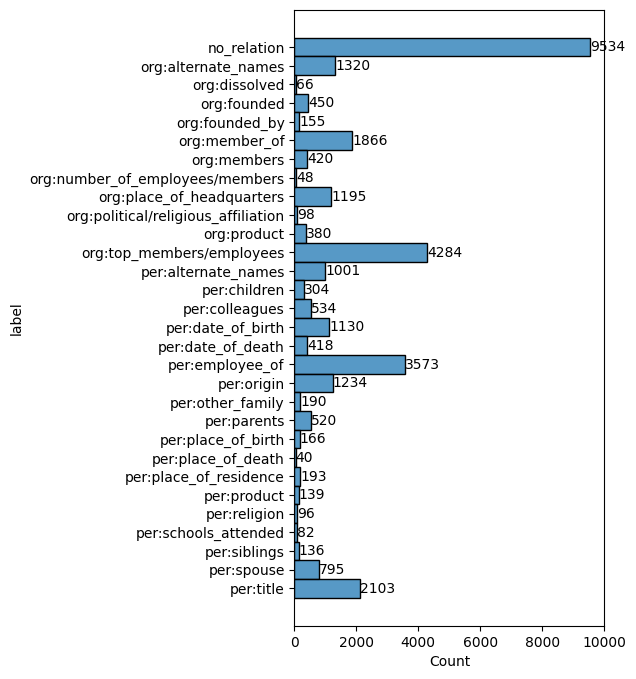

In [519]:
# label 분포
# 가장 적은 것: per:place_of_death=40
# 가장 많은 것: no_relation=9534
plt.figure(figsize = (4, 8))
ax = sns.histplot(data=train_df.sort_values('label'), y='label')
ax.bar_label(ax.containers[1])
plt.show()

In [281]:
train_df.query('label == "no_relation"').sample(5)

,id,sentence,subject_entity,object_entity,label,source,sub_start_idx,obj_start_idx,sub_word,obj_word
17787,17787,예컨대 벨파스트에는 쿠 훌린을 “아일랜드인의 침략에 맞선 얼스터의 방어자”라고 묘사...,"{'word': '쿠 훌린', 'start_idx': 11, 'end_idx': 1...","{'word': '얼스터', 'start_idx': 32, 'end_idx': 34...",no_relation,wikipedia,11,32,쿠 훌린,얼스터
20784,20784,"윤보선 대통령, 장면 총리, 이명박 대통령, 노무현 대통령, 정세균 국회의장, 김두...","{'word': '정세균', 'start_idx': 34, 'end_idx': 36...","{'word': '종로구', 'start_idx': 72, 'end_idx': 74...",no_relation,wikipedia,34,72,정세균,종로구
26857,26857,"베르크야루크와 이스마일의 군대는 하마단과 이스파한 사이의 카라지 평원에서 격돌했고,...","{'word': '베르크야루크', 'start_idx': 47, 'end_idx':...","{'word': '이스파한', 'start_idx': 23, 'end_idx': 2...",no_relation,wikipedia,47,23,베르크야루크,이스파한
29037,29037,한편 2003년 한국의 동양중공업이 동양엘리베이터로부터 인수한 승강기 사업부문의 7...,"{'word': '티센크루프', 'start_idx': 50, 'end_idx': ...","{'word': '엘리베이터', 'start_idx': 22, 'end_idx': ...",no_relation,wikipedia,50,22,티센크루프,엘리베이터
13351,13351,"그는 리오넬 메시, 가레스 베일, 루이스 수아레스, 그리고 로빈 판 페르시 등의 거...","{'word': '리오넬 메시', 'start_idx': 3, 'end_idx': ...","{'word': '아디다스', 'start_idx': 50, 'end_idx': 5...",no_relation,wikipedia,3,50,리오넬 메시,아디다스


# 2. Sentence

## 문장 길이
- 모델의 입력으로 들어가는 입력값 형식: `subejct_entity + [SEP] + obejct_entity + [SEP] + sentence` 
```
[CLS]'민주평화당'[SEP]'대안신당'[SEP] 호남이 기반인 바른미래당 · 대안신당 · 민주평화당이 우여곡절 끝에 합당해 민생당 ( 가칭 ) 으로 재탄생한다. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] .....
```

<br>
- subejct_entity, object_entity 의 길이는 별로 길지 않으므로, 

- 아래의 분석은 sentence의 길이(=토큰 수)를 기준으로 한다. 토크나이징은 klue/roberta 활용
- 문장의 최대 토큰 수 493이므로 모든 문장을 다 잘 사용하려면 max_len=512로 설정 필요.
- 혹은, 문장 내 토큰수가 256 초과인 데이터는 train 589개, test 77개가 있는데, 이것들을 이상치라고 판단하고 제거하고, max_len=256으로 줄이는 방법도 있음.
- 아니면, start_index까지 고려해서, sub_entity or obj_entity의 start_index가 256 이상인 것들(학습셋에 각각 26개, 16개)만 제거해줘도 될 듯함.
- 아니면, start_index가 256이상인 것들은 뒤쪽이 아니라 앞쪽을 truncation하는 방법..?

In [282]:
tokenizer = AutoTokenizer.from_pretrained("klue/roberta-large")

In [283]:
train_df['tokens'] = train_df['sentence'].apply(lambda x: tokenizer.decode(tokenizer(x)['input_ids']))

In [284]:
train_df['tokens']

0        [CLS] 〈 Something 〉 는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범...
1        [CLS] 호남이 기반인 바른미래당 · 대안신당 · 민주평화당이 우여곡절 끝에 합당...
2        [CLS] K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구...
3        [CLS] 균일가 생활용품점 ( 주 ) 아성다이소 ( 대표 박정부 ) 는 코로나19...
4        [CLS] 1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 ...
                               ...                        
32465    [CLS] 한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장...
32466    [CLS] 법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준...
32467    [CLS] 완도군 ( 군수 신우철 ) 이 국토교통부에서 실시한'2019 교통문화지수...
32468    [CLS] 중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평...
32469    [CLS] 화순군 ( 군수 구충곤 ) 은 17일 동면의 이장 20여 명이 코로나 1...
Name: tokens, Length: 32470, dtype: object

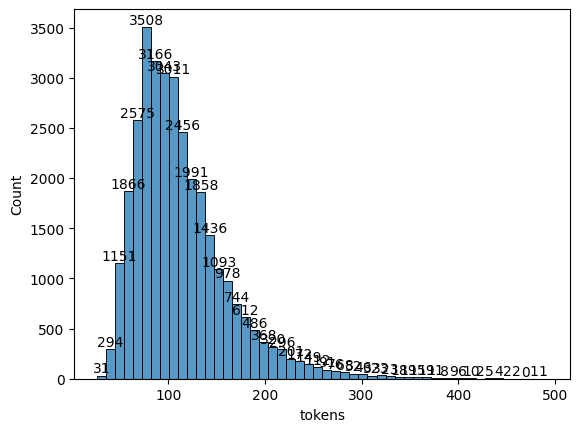

In [285]:
# 토큰 수
ax = sns.histplot(data=train_df['tokens'].apply(len), bins=50)
ax.bar_label(ax.containers[1])
plt.show()

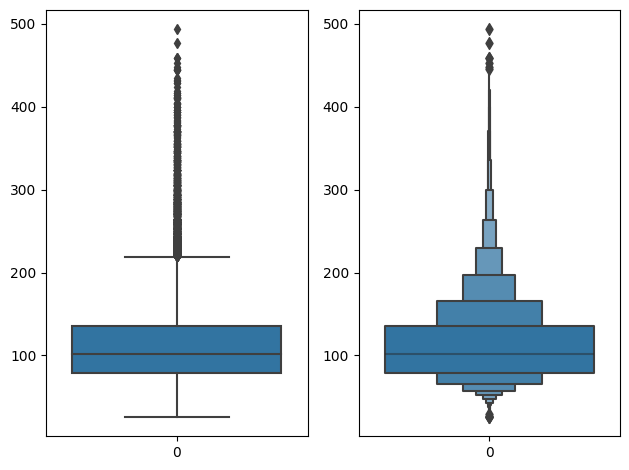

In [286]:
plt.subplot(1,2,1)
ax1 = sns.boxplot(data=train_df['tokens'].apply(len))

plt.subplot(1,2,2)
sns.boxenplot(data=train_df['tokens'].apply(len))
plt.tight_layout()
plt.show()

In [287]:
train_df['tokens'].apply(len).describe()

count    32470.000000
mean       113.147120
std         49.709877
min         26.000000
25%         79.000000
50%        102.000000
75%        135.000000
max        493.000000
Name: tokens, dtype: float64

In [288]:
# test set 문장 길이 분포
test_df['tokens'] = test_df['sentence'].apply(lambda x: tokenizer.decode(tokenizer(x)['input_ids']))
test_df['tokens'].apply(len).describe()

count    7765.000000
mean      108.372312
std        46.331740
min        29.000000
25%        75.000000
50%       100.000000
75%       133.000000
max       454.000000
Name: tokens, dtype: float64

In [289]:
# 길이가 256 초과인 데이터의 개수
print(len(train_df[train_df['tokens'].apply(len) > 256]))
print(len(test_df[test_df['tokens'].apply(len) > 256]))

589
77


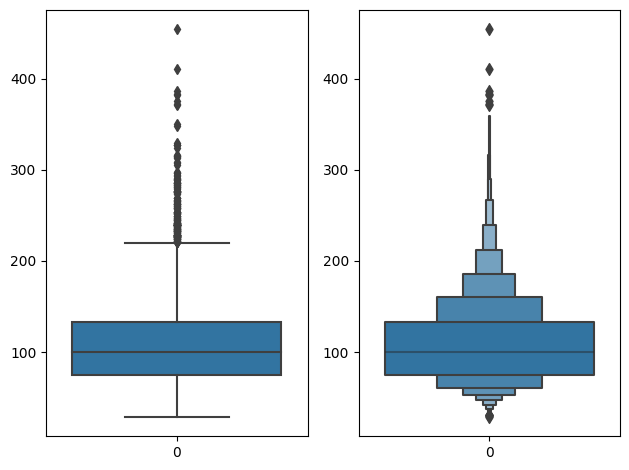

In [290]:
plt.subplot(1,2,1)
ax1 = sns.boxplot(data=test_df['tokens'].apply(len))

plt.subplot(1,2,2)
sns.boxenplot(data=test_df['tokens'].apply(len))
plt.tight_layout()
plt.show()

## 3. UNK
- 이번에는 UNK가 나타나는 양상을 살펴보자.
- () 안의 외국어가 [UNK]처리가 되는 경우가 많다.
- 그러나, 외국어 단어가 subject_entity, object_entity가 되는 경우가 있어서, 전처리 단계에서 단순히 외국어를 제거하는 것은 위험하다.
- train set 보다는 test set에서 위와 같은 경우가 많음.
- 특히 한자가 많음.
- **한자를 잘 처리하는 토크나이저를 찾아보거나, 한자를 전처리할 수 있는 방안 고려 필요**

In [291]:
train_df['UNK_count'] = train_df['tokens'].apply(lambda x: x.count('[UNK]'))
test_df['UNK_count'] = test_df['tokens'].apply(lambda x: x.count('[UNK]'))

In [292]:
train_df[train_df['UNK_count'] > 0].sort_values('UNK_count', ascending=False)[['sentence', 'tokens', 'UNK_count', 'subject_entity', 'object_entity']][:10]

,sentence,tokens,UNK_count,subject_entity,object_entity
12512,"제국 사람들은 자국을 ‘로마 제국', ‘로마인들의 제국'(라틴어: Imperium ...","[CLS] 제국 사람들은 자국을 ‘ 로마 제국 ', ‘ 로마인들의 제국'( 라틴어 ...",12,"{'word': '로마 제국', 'start_idx': 13, 'end_idx': ...","{'word': '로마인', 'start_idx': 22, 'end_idx': 24..."
15948,툰쿠 압둘 라만(자위문자로 تونكو عبدالرحمن ڤوترا الهاج ابن...,[CLS] 툰쿠 압둘 라만 ( 자위문자로 [UNK] [UNK] [UNK] [UNK]...,10,"{'word': '툰쿠 압둘 라만', 'start_idx': 0, 'end_idx'...","{'word': '말레이시아', 'start_idx': 82, 'end_idx': ..."
16532,이날 발대식에는 ▵부산경찰청 산하 15개 경찰서 직원협의회 대표 ▵자유한국당 유재중...,[CLS] 이날 발대식에는 [UNK] 산하 15개 경찰서 직원협의회 대표 [UNK]...,9,"{'word': '유재중', 'start_idx': 43, 'end_idx': 45...","{'word': '부산 수영구', 'start_idx': 52, 'end_idx':..."
4597,프랑스군이 투언안 요새를 함락하면서 프랑스 치안청장인 프랑수아 쥘 아르망(Franç...,[CLS] 프랑스군이 투언안 요새를 함락하면서 프랑스 치안청장인 프랑수아 [UNK]...,9,"{'word': '쥘 아르망', 'start_idx': 35, 'end_idx': ...","{'word': '프랑스', 'start_idx': 0, 'end_idx': 2, ..."
19992,"위명대왕 이일광(威明大王 李日㫕, 베트남어: Uy Minh Đại vương Lý ...","[CLS] 위명대왕 이일광 ( [UNK] 明 大 王 [UNK] 日 [UNK], 베트...",8,"{'word': '정명황후', 'start_idx': 97, 'end_idx': 1...","{'word': '리 왕조', 'start_idx': 78, 'end_idx': 8..."
14094,"석가제환인다라(釋迦提桓因陀羅)에서 석가는 샤크라(Śakra)의 음역어인데, 샤크라는...",[CLS] 석가제환인다라 ( [UNK] [UNK] [UNK] [UNK] [UNK] ...,8,"{'word': '인드라', 'start_idx': 54, 'end_idx': 56...","{'word': 'Indra', 'start_idx': 58, 'end_idx': ..."
25921,"비엣남꾸옥전당 (Việt Nam Quốc Dân Đảng, 베트남 國民黨, 베트남 ...","[CLS] 비엣남꾸옥전당 ( [UNK] Nam [UNK] [UNK] [UNK], 베...",8,"{'word': '베트남 국민당', 'start_idx': 42, 'end_idx'...","{'word': '비엣꾸옥 (Việt Quốc)', 'start_idx': 55, ..."
28672,"허가이(許哥而(또는 許哥誼(허가의)(또는 許哥誼(허가의)(허가의)), , 1908년...",[CLS] 허가이 ( [UNK] [UNK] 而 ( 또는 [UNK] [UNK] [UN...,8,"{'word': '허가이', 'start_idx': 0, 'end_idx': 2, ...","{'word': '공산주의', 'start_idx': 93, 'end_idx': 9..."
29007,"쿠살라의 장남 토곤 테무르(妥懽貼睦爾)가 살아 있었지만, 당시 권력을 잡고 있었던 ...",[CLS] 쿠살라의 장남 토곤 테무르 ( [UNK] [UNK] [UNK] [UNK]...,8,"{'word': '토곤 테무르', 'start_idx': 8, 'end_idx': ...","{'word': '쿠살라', 'start_idx': 0, 'end_idx': 2, ..."
10419,도쿠가와 이에미쓰의 정실인 다카쓰카사 다카코 휘하의 하급 시녀인 오스에(御末)로 오...,[CLS] 도쿠가와 이에미쓰의 정실인 다카쓰카사 다카코 휘하의 하급 시녀인 오스에 ...,8,"{'word': '도쿠가와 이에미쓰', 'start_idx': 0, 'end_idx...","{'word': '다카쓰카사 다카코', 'start_idx': 15, 'end_id..."


In [391]:
# sub_word가 한글이나 영어가 아닌 단어를 포함하는 경우
train_df[train_df['sub_word'].apply(lambda x: re.search('^[ㄱ-ㅎ가-힣A-Z0-9a-z\(\)\《\\》]', x)).isna()==True]

,id,sentence,subject_entity,object_entity,label,source,sub_start_idx,obj_start_idx,sub_word,obj_word,tokens,UNK_count
16477,16477,"김기창(金基昶, 1913년 2월 18일 ~ 2001년 1월 23일)은 대한민국의 동...","{'word': '金基昶', 'start_idx': 4, 'end_idx': 6, ...","{'word': '김기창', 'start_idx': 0, 'end_idx': 2, ...",per:alternate_names,wikipedia,4,0,金基昶,김기창,"[CLS] 김기창 ( 金 基 [UNK], 1913년 2월 18일 ~ 2001년 1월...",3


In [521]:
# obj_word가 한글이나 영어가 아닌 단어를 포함하는 경우
train_df[train_df['obj_word'].apply(lambda x: re.search('^[ㄱ-ㅎ가-힣A-Z0-9a-z\(\)\《\\》]', x)).isna()==True]

,id,sentence,subject_entity,object_entity,label,source,sub_start_idx,obj_start_idx,sub_word,obj_word,tokens,UNK_count,sub_type,obj_type
191,191,쇼니 씨(少弐氏)의 8대 당주로 쇼니 요리히사(少弐頼尚)의 둘째 아들이다.,"{'word': '쇼니 씨', 'start_idx': 0, 'end_idx': 3,...","{'word': '少弐氏', 'start_idx': 5, 'end_idx': 7, ...",per:alternate_names,wikipedia,0,5,쇼니 씨,少弐氏,[CLS] 쇼니 씨 ( [UNK] [UNK] 氏 ) 의 8대 당주로 쇼니 요리히사 ...,6,PER,PER
374,374,이어서 1991년 발표한 《사랑을 잃은 풀꽃》이 히트하여 《NHK 홍백가합전》에 첫...,"{'word': '다마키 고지', 'start_idx': 62, 'end_idx':...","{'word': '玉置浩二', 'start_idx': 69, 'end_idx': 7...",per:alternate_names,wikipedia,62,69,다마키 고지,玉置浩二,[CLS] 이어서 1991년 발표한 《 사랑을 잃은 풀꽃 》 이 히트하여 《 NHK...,4,PER,PER
540,540,"덴분 23년(1554년) 하루노부는 후 호조씨(後北条氏), 이마가와씨(今川氏)와 서...","{'word': '호조씨', 'start_idx': 22, 'end_idx': 24...","{'word': '後北条氏', 'start_idx': 26, 'end_idx': 2...",org:alternate_names,wikipedia,22,26,호조씨,後北条氏,[CLS] 덴분 23년 ( 1554년 ) 하루노부는 후 호조씨 ( 後 北 [UNK]...,2,ORG,ORG
1310,1310,재취 부인 도영심 여사와의 사이에 1남 1녀를 두고 있으며 이 가운데 아들(의붓아들...,"{'word': '이재영', 'start_idx': 81, 'end_idx': 83...","{'word': '前 새누리당 비례대표', 'start_idx': 62, 'end_...",per:employee_of,wikipedia,81,62,이재영,前 새누리당 비례대표,[CLS] 재취 부인 도영심 여사와의 사이에 1남 1녀를 두고 있으며 이 가운데 아...,0,PER,ORG
1797,1797,"전란이라고 말해야 15세기 전반에 들어선 뒤, 난부 가문의 센보쿠(仙北), 가즈노(...","{'word': '다테 가문', 'start_idx': 54, 'end_idx': ...","{'word': '伊達氏', 'start_idx': 60, 'end_idx': 62...",org:alternate_names,wikipedia,54,60,다테 가문,伊達氏,"[CLS] 전란이라고 말해야 15세기 전반에 들어선 뒤, 난부 가문의 센보쿠 ( [...",5,ORG,ORG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30800,30800,"디오니소스(Διόνυσος) (Dionȳsos) (Dionysos, Dionysus...","{'word': '디오니소스', 'start_idx': 0, 'end_idx': 4...","{'word': 'Διόνυσος', 'start_idx': 6, 'end_idx'...",per:alternate_names,wikipedia,0,6,디오니소스,Διόνυσος,"[CLS] 디오니소스 ( [UNK] ) ( [UNK] ) ( Dionysos, Di...",2,PER,PER
31075,31075,최근 일본 유명 배우 히가시데 마사히로(東出昌大·31)와 카라타 에리카(唐田えりか·...,"{'word': '히가시데 마사히로', 'start_idx': 12, 'end_id...","{'word': '東出昌大', 'start_idx': 22, 'end_idx': 2...",per:alternate_names,wikitree,12,22,히가시데 마사히로,東出昌大,[CLS] 최근 일본 유명 배우 히가시데 마사히로 ( 東 出 [UNK] 大 · 31...,3,PER,PER
31406,31406,"코자이 가오리(본명:香西 香, 1963년 8월 28일~)는 일본의 여성 엔카 가수이다.","{'word': '코자이 가오리', 'start_idx': 0, 'end_idx':...","{'word': '香西 香', 'start_idx': 11, 'end_idx': 1...",per:alternate_names,wikipedia,0,11,코자이 가오리,香西 香,"[CLS] 코자이 가오리 ( 본명 : [UNK] 西 [UNK], 1963년 8월 2...",2,PER,PER
31725,31725,선진통일당(先進統一黨)은 대한민국의 정당이었다.,"{'word': '선진통일당', 'start_idx': 0, 'end_idx': 4...","{'word': '先進統一黨', 'start_idx': 6, 'end_idx': 1...",org:alternate_names,wikipedia,0,6,선진통일당,先進統一黨,[CLS] 선진통일당 ( 先 [UNK] 統 一 黨 ) 은 대한민국의 정당이었다. [...,1,ORG,ORG


In [522]:
# sub_word or obj_word가 한글이나 영어가 아닌 단어를 포함하는 경우
print(len(test_df[test_df['sub_word'].apply(lambda x: re.search('^[ㄱ-ㅎ가-힣A-Z0-9a-z\(\)\《\\》]', x)).isna()==True]))
test_df[test_df['sub_word'].apply(lambda x: re.search('^[ㄱ-ㅎ가-힣A-Z0-9a-z\(\)\《\\》]', x)).isna()==True]

44


,id,sentence,subject_entity,object_entity,label,source,sub_start_idx,obj_start_idx,sub_word,obj_word,tokens,UNK_count,sub_type,obj_type
21,21,"이날 기탁식에서는 ㈜와이엔텍(회장 박용하) 1억 원, ㈜거명이앤씨(회장 반재경)가 ...","{'word': '㈜거명이앤씨', 'start_idx': 30, 'end_idx':...","{'word': '반재경', 'start_idx': 40, 'end_idx': 42...",100,wikitree,30,40,㈜거명이앤씨,반재경,"[CLS] 이날 기탁식에서는 ㈜와이엔텍 ( 회장 박용하 ) 1억 원, ㈜거명이앤씨 ...",0,ORG,PER
287,287,㈜진성퍼니처 김효중 대표는 “주위의 어려운 이웃을 돕는 일에 동참할 수 있어 뜻깊게...,"{'word': '㈜진성퍼니처', 'start_idx': 0, 'end_idx': ...","{'word': '대표', 'start_idx': 11, 'end_idx': 12,...",100,wikitree,0,11,㈜진성퍼니처,대표,[CLS] ㈜진성퍼니처 김효중 대표는 “ 주위의 어려운 이웃을 돕는 일에 동참할 수...,0,ORG,POH
296,296,"권수평(權守平, ~ 1250년)은 고려의 문신이다.","{'word': '權守平', 'start_idx': 4, 'end_idx': 6, ...","{'word': '권수평', 'start_idx': 0, 'end_idx': 2, ...",100,wikipedia,4,0,權守平,권수평,"[CLS] 권수평 ( 權 [UNK] 平, ~ 1250년 ) 은 고려의 문신이다. [...",1,PER,PER
362,362,"이밖에도 홍기은 동 지사협 회장은 ‘자치공동체공헌’, 박경숙 그린발레단장은 ‘문화예...","{'word': '㈜', 'start_idx': 108, 'end_idx': 108...","{'word': '대표', 'start_idx': 115, 'end_idx': 11...",100,wikitree,108,115,㈜,대표,"[CLS] 이밖에도 홍기은 동 지사협 회장은 ‘ 자치공동체공헌 ’, 박경숙 그린발레...",0,ORG,POH
373,373,대원군(帶原君)이었다가 뒤에 대은군(帶恩君)으로 변경된다.,"{'word': '帶原君', 'start_idx': 4, 'end_idx': 6, ...","{'word': '대원군', 'start_idx': 0, 'end_idx': 2, ...",100,wikipedia,4,0,帶原君,대원군,[CLS] 대원군 ( [UNK] 原 君 ) 이었다가 뒤에 대은군 ( [UNK] [U...,3,ORG,POH
395,395,게이오(慶應) 3년(1868년) 12월 9일(양력 1월 3일)에 내려진 왕정복고의 ...,"{'word': '慶應', 'start_idx': 4, 'end_idx': 5, '...","{'word': '게이오', 'start_idx': 0, 'end_idx': 2, ...",100,wikipedia,4,0,慶應,게이오,[CLS] 게이오 ( [UNK] [UNK] ) 3년 ( 1868년 ) 12월 9일 ...,2,ORG,DAT
424,424,아들 이집(李集)은 신돈(辛旽)과 대립하여 영천으로 피신하였다가 신돈(辛旽)이 주살...,"{'word': '李集', 'start_idx': 6, 'end_idx': 7, '...","{'word': '이집', 'start_idx': 3, 'end_idx': 4, '...",100,wikipedia,6,3,李集,이집,[CLS] 아들 이집 ( [UNK] 集 ) 은 신돈 ( [UNK] [UNK] ) 과...,5,PER,PER
1247,1247,"환조(丸彫)로 된 단독상(單獨像)은 많지 않으나 북 프랑스, 라인 연안, 스칸디나비...","{'word': '丸彫', 'start_idx': 3, 'end_idx': 4, '...","{'word': '환조', 'start_idx': 0, 'end_idx': 1, '...",100,wikipedia,3,0,丸彫,환조,[CLS] 환조 ( [UNK] [UNK] ) 로 된 단독상 ( [UNK] 獨 [UN...,6,PER,PER
1484,1484,"김치 수입업체인 미국 ‘울타리USA’ 관계자는 “미국에는 한국산김치, 일본산 김치,...","{'word': '㈜뜨레찬', 'start_idx': 76, 'end_idx': 7...","{'word': '김치', 'start_idx': 51, 'end_idx': 52,...",100,wikitree,76,51,㈜뜨레찬,김치,[CLS] 김치 수입업체인 미국 ‘ 울타리USA ’ 관계자는 “ 미국에는 한국산김치...,0,ORG,POH
1686,1686,갈문왕(葛文王)은 신라 때 왕실에서 왕위에 오르지 못하고 죽은 왕족 및 왕의 근친 ...,"{'word': '葛文王', 'start_idx': 4, 'end_idx': 6, ...","{'word': '갈문왕', 'start_idx': 0, 'end_idx': 2, ...",100,wikipedia,4,0,葛文王,갈문왕,[CLS] 갈문왕 ( [UNK] 文 王 ) 은 신라 때 왕실에서 왕위에 오르지 못하...,1,PER,PER


In [524]:
# sub_word or obj_word가 한글이나 영어가 아닌 단어를 포함하는 경우
print(len(test_df[test_df['obj_word'].apply(lambda x: re.search('^[ㄱ-ㅎ가-힣A-Z0-9a-z\(\)\《\\》]', x)).isna()==True]))
test_df[test_df['obj_word'].apply(lambda x: re.search('^[ㄱ-ㅎ가-힣A-Z0-9a-z\(\)\《\\》]', x)).isna()==True]

24


,id,sentence,subject_entity,object_entity,label,source,sub_start_idx,obj_start_idx,sub_word,obj_word,tokens,UNK_count,sub_type,obj_type
16,16,"강명구(姜明求, 1917년~2000년)는 대한민국의 건축가이다.","{'word': '강명구', 'start_idx': 0, 'end_idx': 2, ...","{'word': '姜明求', 'start_idx': 4, 'end_idx': 6, ...",100,wikipedia,0,4,강명구,姜明求,"[CLS] 강명구 ( [UNK] 明 求, 1917년 ~ 2000년 ) 는 대한민국의...",1,PER,PER
375,375,"그는 종조 할아버지들인 한상경(韓尙敬)과 한상덕에 의해 양육되었으며, 종조 할아버지...","{'word': '류태재', 'start_idx': 80, 'end_idx': 82...","{'word': '韓尙桓', 'start_idx': 51, 'end_idx': 53...",100,wikipedia,80,51,류태재,韓尙桓,[CLS] 그는 종조 할아버지들인 한상경 ( 韓 [UNK] [UNK] ) 과 한상덕...,4,PER,PER
1280,1280,유선(劉禪)이 등극한 후 제갈량(諸葛亮)에 의해 권학종사(勸學從事)에 임명되었다.,"{'word': '제갈량', 'start_idx': 14, 'end_idx': 16...","{'word': '諸葛亮', 'start_idx': 18, 'end_idx': 20...",100,wikipedia,14,18,제갈량,諸葛亮,[CLS] 유선 ( [UNK] [UNK] ) 이 등극한 후 제갈량 ( [UNK] [...,7,PER,PER
2234,2234,일본군에게 사로잡혔던 임해군(臨海君)·순화군(順和君) 두 왕자가 송환된 후 그 뒤 ...,"{'word': '임해군', 'start_idx': 12, 'end_idx': 14...","{'word': '臨海君', 'start_idx': 16, 'end_idx': 18...",100,wikipedia,12,16,임해군,臨海君,[CLS] 일본군에게 사로잡혔던 임해군 ( [UNK] 海 君 ) · 순화군 ( [U...,2,ORG,PER
2974,2974,"연합뉴스에 따르면, 일본 정부 대변인 격인 스가 요시히데(菅義偉) 관방장관도 이날 ...","{'word': '일본 정부', 'start_idx': 11, 'end_idx': ...","{'word': '菅義偉', 'start_idx': 32, 'end_idx': 34...",100,wikitree,11,32,일본 정부,菅義偉,"[CLS] 연합뉴스에 따르면, 일본 정부 대변인 격인 스가 요시히데 ( [UNK] ...",2,ORG,PER
3002,3002,본관은 결성(結城)으로 같은 집안의 독립운동가로 이름을 알리며 광복후 교육자와 역사...,"{'word': '장도빈', 'start_idx': 63, 'end_idx': 65...","{'word': '張道斌', 'start_idx': 67, 'end_idx': 69...",100,wikipedia,63,67,장도빈,張道斌,[CLS] 본관은 결성 ( [UNK] 城 ) 으로 같은 집안의 독립운동가로 이름을 ...,4,PER,PER
3199,3199,시호는 낭공대사(朗空大師)이며 탑호는 백월서운(白月栖雲)이다.,"{'word': '백월서운', 'start_idx': 21, 'end_idx': 2...","{'word': '朗空大師', 'start_idx': 9, 'end_idx': 12...",100,wikipedia,21,9,백월서운,朗空大師,[CLS] 시호는 낭공대사 ( [UNK] 空 大 師 ) 이며 탑호는 백월서운 ( 白...,2,PER,PER
3269,3269,"인현왕후 민씨(仁顯王后 閔氏, 1667년 5월 15일(음력 4월 23일)(음력 4월...","{'word': '閔氏', 'start_idx': 13, 'end_idx': 14,...","{'word': '仁顯王后', 'start_idx': 8, 'end_idx': 11...",100,wikipedia,13,8,閔氏,仁顯王后,"[CLS] 인현왕후 민씨 ( 仁 [UNK] 王 [UNK] [UNK] 氏, 1667년...",3,PER,PER
3507,3507,이부는 원상과 헤어지게 되었으므로 어쩔 수 없이 원담(袁譚)에게 항복했고 평원(平原...,"{'word': '원상', 'start_idx': 4, 'end_idx': 5, '...","{'word': '袁譚', 'start_idx': 30, 'end_idx': 31,...",100,wikipedia,4,30,원상,袁譚,[CLS] 이부는 원상과 헤어지게 되었으므로 어쩔 수 없이 원담 ( [UNK] [U...,2,PER,PER
3607,3607,1112년에는 혜민국(惠民局)을 설치하여 빈민들의 시약을 담당하게 하였고 이듬해에는...,"{'word': '혜민국', 'start_idx': 8, 'end_idx': 10,...","{'word': '惠民局', 'start_idx': 12, 'end_idx': 14...",100,wikipedia,8,12,혜민국,惠民局,[CLS] 1112년에는 혜민국 ( [UNK] 民 [UNK] ) 을 설치하여 빈민들...,2,ORG,ORG


## TODO
1. sub_word or obj_word 자체가 UNK 처리되는지 확인.
2. 한자 잘 처리하는 토크나이저 찾기 (다국어 모델 XLM-RoBERTa? 한자어 외에도 러시아어 등등 잘 처리할 수도.) <br>
    -> 그러나 KLUE 논문에 의하면 XLM-R-large 의 RE 성능은 58.39, 61.15 인데 klue-roberta-large의 성능은 71.13, 72.98임.
3. start_idx가 256을 넘어서 나타나는 예시들 살펴보기 (앞부분 truncation해도 되는지)